In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA homicidios

Primero abordaremos el dataset de homicidios, para buscar datos relevantes sobre las vicitmas de accidentes que murieron a causa del suceso, ya sea el mismo día o días después

In [139]:
dfhomicidios=pd.read_csv('Datasets\homicidios.csv')
dfhomicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Id                             717 non-null    object
 1   Rol                            717 non-null    object
 2   Víctima                        717 non-null    object
 3   Sexo                           717 non-null    object
 4   Edad                           717 non-null    object
 5   Días_de_muerte_post_accidente  717 non-null    object
 6   No_víctimas                    717 non-null    object
 7   Fecha                          717 non-null    object
 8   Hora                           717 non-null    object
 9   Tipo_de_calle                  717 non-null    object
 10  Calle                          717 non-null    object
 11  Comuna                         717 non-null    object
 12  X                              717 non-null    object
 13  Y    

In [140]:
#se transforman las columnas al tipo de datoadecuado, para poder usarse
dfhomicidios['Fecha']=pd.to_datetime(dfhomicidios.Fecha,errors='coerce')
dfhomicidios.loc[dfhomicidios.Edad!='Sd','Edad']=dfhomicidios.loc[dfhomicidios.Edad!='Sd','Edad'].astype(int)
dfhomicidios.loc[dfhomicidios.Días_de_muerte_post_accidente!='Sd','Días_de_muerte_post_accidente']=dfhomicidios.loc[dfhomicidios.Días_de_muerte_post_accidente!='Sd','Días_de_muerte_post_accidente'].astype(float)
dfhomicidios.loc[dfhomicidios.Días_de_muerte_post_accidente!='Sd','Días_de_muerte_post_accidente']=dfhomicidios.loc[dfhomicidios.Días_de_muerte_post_accidente!='Sd','Días_de_muerte_post_accidente'].astype(int)
dfhomicidios.loc[dfhomicidios.Días_de_muerte_post_accidente!='Sd','Días_de_muerte_post_accidente']=dfhomicidios.loc[dfhomicidios.Días_de_muerte_post_accidente!='Sd','Días_de_muerte_post_accidente'].astype(float)
dfhomicidios.loc[dfhomicidios.No_víctimas!='Sd','No_víctimas']=dfhomicidios.loc[dfhomicidios.No_víctimas!='Sd','No_víctimas'].astype(float)
dfhomicidios.loc[dfhomicidios.No_víctimas!='Sd','No_víctimas']=dfhomicidios.loc[dfhomicidios.No_víctimas!='Sd','No_víctimas'].astype(int)
dfhomicidios.loc[dfhomicidios.Hora!='Sd','Hora']=dfhomicidios.loc[dfhomicidios.Hora!='Sd','Hora'].astype(int)
dfhomicidios.loc[dfhomicidios.Comuna!='Sd','Comuna']=dfhomicidios.loc[dfhomicidios.Comuna!='Sd','Comuna'].astype(float)
dfhomicidios.loc[dfhomicidios.Comuna!='Sd','Comuna']=dfhomicidios.loc[dfhomicidios.Comuna!='Sd','Comuna'].astype(int)
dfhomicidios.loc[dfhomicidios['X']!='.','X']=dfhomicidios.loc[dfhomicidios['X']!='.','X'].astype(float)
dfhomicidios.loc[dfhomicidios['Y']!='.','Y']=dfhomicidios.loc[dfhomicidios['Y']!='.','Y'].astype(float)


## Variables individuales
Analizaremos cada columna del dataset, para evaluar características relevantes de cada columna

### Fecha
En la primer gráfica podemos observar que el año con más accidentes fué el 2018, despúes vimos una disminución drástica para lo siguientes años, esto puede deberse a un bue plan de acción opara disminuir estas estadísticas o porque no se registraron completamente todos los accidentes.

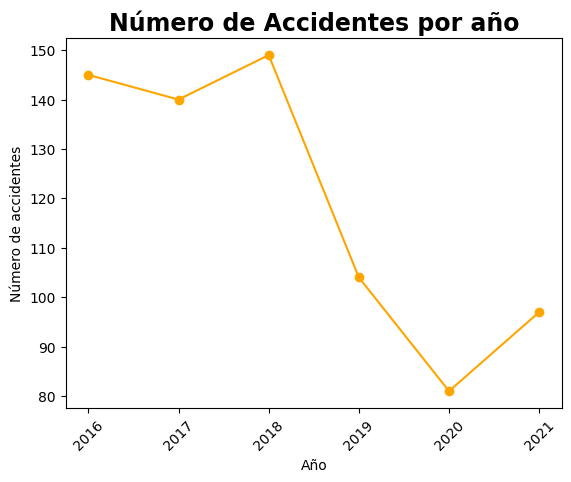

In [185]:
graffecha=dfhomicidios.Fecha.groupby(dfhomicidios['Fecha'].dt.year).size()
graffecha.plot(kind='line', rot=45, xlabel='Año',marker='o',color='orange', ylabel='Número de accidentes')
plt.title("Número de Accidentes por año",fontdict={'size':17,'weight':'bold'})
plt.show()



### Rol
Dentro de la columna rol nos indica cual era el rol en el medio de trnasporte qe ocupaba la persona que murió a causa del accidente, donde observamos que encabezan el conductor como las personas que más tienden a fallecer al momento de un acciendte dominando con un 46 del total, seguido por los peatones con un 37.2%, se suamn los pasajeros acompañantes con un 11.2% y siguen los ciclisas con un 4%, cabe destacar que en la maoyoría de caso que ocurre un accidente donde involucra un ciclista, la víctima suele ser el ciclista cuando también está involcurado un automóvil. del total de datos, desconcemos el rol del 1.5% del total de datos.

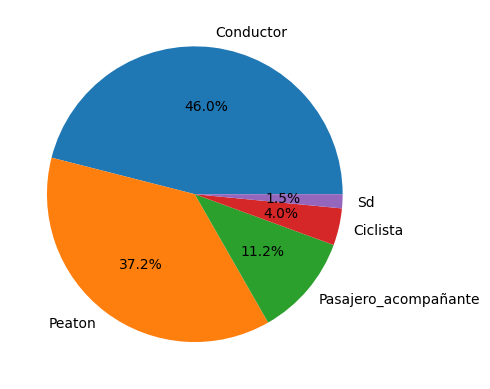

In [142]:
valrol=dfhomicidios.Rol.value_counts().values
etiqrol=dfhomicidios.Rol.value_counts().index
plt.pie(valrol,autopct='%1.1f%%',labels=etiqrol)
plt.show()

### Víctima
Aqui podemos notar que los medios de transporte que más predominan son las motocicletas seguido de los peatones, dando a entender que cualquier persona que sufra un accidnete donde sea la víctima y vaya en este medio de transporte es más propenso a morir, dado a que se esta más expuesto a sufri lesiones graves al no portar con medidas mas reforzadas de seguridad comparado con un vehículo

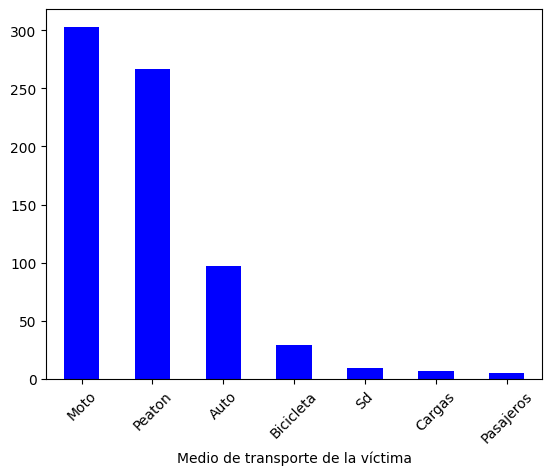

In [144]:
dfhomicidios.Víctima.value_counts().plot(kind='bar',color='blue',rot=45,xlabel='Medio de transporte de la víctima')
plt.show()

### Sexo
Aquí observamos que la mayoría de casos con un 76% predominan los hombres, y un 23.2% las mujeres, 0.8% se desconoce su sexo.

<Axes: title={'center': 'Porcentaje de muertes por sexo'}>

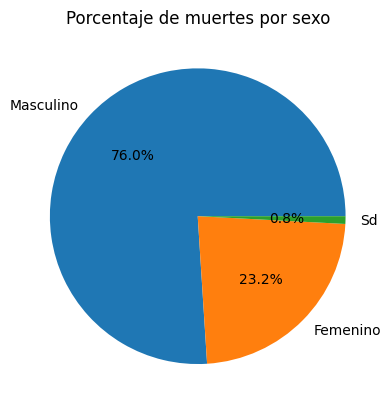

In [149]:
dfhomicidios.Sexo.value_counts().plot(kind='pie',autopct='%1.1f%%',title='Porcentaje de muertes por sexo',ylabel='')

aqu

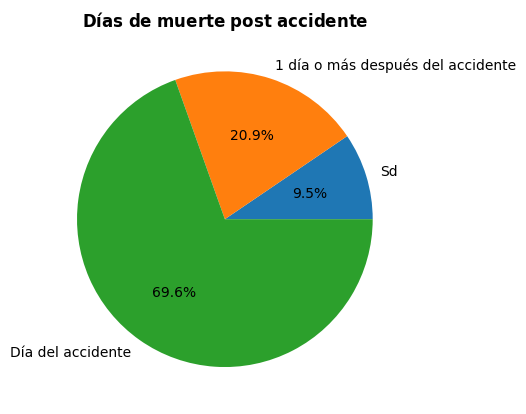

In [175]:
dmpahomicidios=dfhomicidios['Días_de_muerte_post_accidente'].value_counts()[0:2]
dmpahomicidios.loc['1 día o más después del accidente']=dfhomicidios['Días_de_muerte_post_accidente'].value_counts()[2:-1].sum()
dmpahomicidios.loc['Día del accidente']=dmpahomicidios[0.0]
dmpahomicidios.drop(index=0.0,inplace=True)
dmpahomicidios.plot(kind='pie',autopct='%1.1f%%',ylabel='',title=r"$\bf{Días\ de\ muerte\ post\ accidente}$")
plt.show()

In [122]:
dfhomicidios.columns

Index(['Id', 'Rol', 'Víctima', 'Sexo', 'Edad', 'Días_de_muerte_post_accidente',
       'No_víctimas', 'Fecha', 'Hora', 'Tipo_de_calle', 'Calle', 'Comuna', 'X',
       'Y', 'Víctimas', 'Acusado', 'Cruce_o_altura'],
      dtype='object')